# Using SciKit-Learn for classification and regression

In [1]:
from sklearn import datasets
from sklearn.neural_network import MLPClassifier

In [2]:
iris = datasets.load_iris()

In [3]:
inputs = iris.data

#### 1.1 - Iris data - Checking volumes and shapes

In [4]:
inputs[:20]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3]])

In [19]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [20]:
outputs = iris.target

In [21]:
inputs.shape, iris.target.shape

((150, 4), (150,))

#### 1.2 - Train & Test - dataset splitting

It is entirely common practice to split an entire dataset into subsets for the purposes of training data and test data. The 
concept is that we test the model on data it has never seen before to determine a truer outcome than reprocessing data that was used to build the model with. 

We can define the split ratios but the idea is to create a good (_or best_) balance, where good is considered to be the most training data we can afford while keeping a reasonable test set. In reality this changes from project to project typically hovering in the 80/20 ratio for train/test and some in the 70/30 train/test regions.

**note:** It is also common practice to refer to `x` as the inputs and `y` as the expected results. 


In [22]:
from sklearn.model_selection import train_test_split

In [32]:
# we consider the whole dataset as 1, therefore defining the test_size
# split at 0.2 equates to 20% or as noted above adhereing to the 80/20
# split mechanism that is fairly ubiquitous. 
x_train, x_test, y_train, y_test = train_test_split(inputs, outputs, test_size = 0.2)

In [33]:
print(f"{'x_train':>21}{'x_test':>15}{'y_train':>15}{'x_test':>15}")
print("-" * 80)
print(f"Shape:{str(x_train.shape):>15}{str(x_test.shape):>15}{str(y_train.shape):>15}{str(x_test.shape):>15}")


              x_train         x_test        y_train         x_test
--------------------------------------------------------------------------------
Shape:       (120, 4)        (30, 4)         (120,)        (30, 4)


#### 1.3 Network training



In [34]:
network = MLPClassifier(max_iter=2000, 
                        tol=0.000100, 
                        activation='logistic', 
                        solver='adam', 
                        learning_rate='constant', 
                        learning_rate_init=0.001, 
                        batch_size=32, 
                        hidden_layer_sizes=(4, 4),
                        #early_stopping=True,
                        #n_iter_no_change=50,
                        verbose=True)

network.fit(x_train, y_train)

Iteration 1, loss = 1.11814591
Iteration 2, loss = 1.11569309
Iteration 3, loss = 1.11451966
Iteration 4, loss = 1.11228686
Iteration 5, loss = 1.11144320
Iteration 6, loss = 1.10950255
Iteration 7, loss = 1.10822025
Iteration 8, loss = 1.10698825
Iteration 9, loss = 1.10580711
Iteration 10, loss = 1.10487173
Iteration 11, loss = 1.10407610
Iteration 12, loss = 1.10326222
Iteration 13, loss = 1.10245018
Iteration 14, loss = 1.10161911
Iteration 15, loss = 1.10102949
Iteration 16, loss = 1.10066249
Iteration 17, loss = 1.09959588
Iteration 18, loss = 1.09928436
Iteration 19, loss = 1.09879648
Iteration 20, loss = 1.09847939
Iteration 21, loss = 1.09824291
Iteration 22, loss = 1.09765913
Iteration 23, loss = 1.09751272
Iteration 24, loss = 1.09707256
Iteration 25, loss = 1.09685789
Iteration 26, loss = 1.09650468
Iteration 27, loss = 1.09638486
Iteration 28, loss = 1.09603693
Iteration 29, loss = 1.09584130
Iteration 30, loss = 1.09564755
Iteration 31, loss = 1.09547638
Iteration 32, los

MLPClassifier(activation='logistic', batch_size=32, hidden_layer_sizes=(4, 4),
              max_iter=2000, verbose=True)

In [35]:
# Class labels for each output. 
network.classes_

array([0, 1, 2])

In [36]:
network.coefs_

[array([[-0.54742631, -0.53826953,  0.65217864, -0.54088623],
        [-1.17034985, -1.18919731,  1.02592261, -1.46788412],
        [ 1.14336886,  1.1348185 , -1.0473566 ,  2.46787547],
        [ 1.84647677,  1.81287871, -2.23448736,  2.81865779]]),
 array([[-2.43290349,  2.46931542, -2.31651291,  2.31300391],
        [-3.14140872,  2.2688746 , -2.23952984,  2.89941279],
        [ 2.62290807, -3.98551419,  4.42275164, -2.05257184],
        [-3.70395087,  0.40421615, -0.41358356,  3.95871996]]),
 array([[ 3.341905  , -2.50117654, -0.88420648],
        [-2.20478623, -1.92768522,  3.07098022],
        [ 2.0015921 ,  2.38281398, -3.84324078],
        [-3.4204975 ,  1.70198297,  1.60741286]])]

In [37]:
network.n_layers_

4

In [38]:
# comment note. remember the layers
# have been defined as (4,4)
# biases connect to each hidden layer
# culminating with the output layer.
network.intercepts_

[array([-1.50938394, -1.27793852,  1.58655431, -1.09746461]),
 array([ 0.19590934, -1.56620906,  1.31852993, -0.86375339]),
 array([0.06353798, 0.02452383, 0.35111406])]

#### 1.4 Network evaluation

In [39]:
predictions = network.predict(x_test)
predictions

array([1, 1, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 2, 0,
       2, 2, 1, 0, 1, 0, 0, 0])

In [40]:
y_test

array([1, 1, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 1, 1, 2, 0,
       2, 2, 1, 0, 1, 0, 0, 0])

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [43]:
accuracy_score(y_test, predictions)

0.9666666666666667

/usr/local/Caskroom/miniconda/base/envs/pykit/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


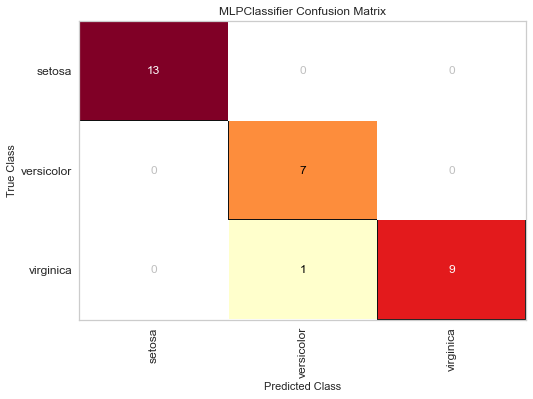

<AxesSubplot:title={'center':'MLPClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [45]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix = ConfusionMatrix(network, classes=iris.target_names)
confusion_matrix.fit(x_train, y_train)
confusion_matrix.score(x_test, y_test)
confusion_matrix.show()

#### 1.5 Network classification

In [48]:
x_test[0], y_test[0]

(array([6.1, 2.9, 4.7, 1.4]), 1)

In [49]:
x_test[0].shape

(4,)

In [50]:
nx = x_test[0].reshape(1, -1)
nx.shape

(1, 4)

In [51]:
network.predict(nx)

array([1])